# Bayesian analysis of the empirical saturation point (refactored version)

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Performing Bayesian linear regression on EFT predictions (Coester Band)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_1, beta_0]


Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 42 seconds.


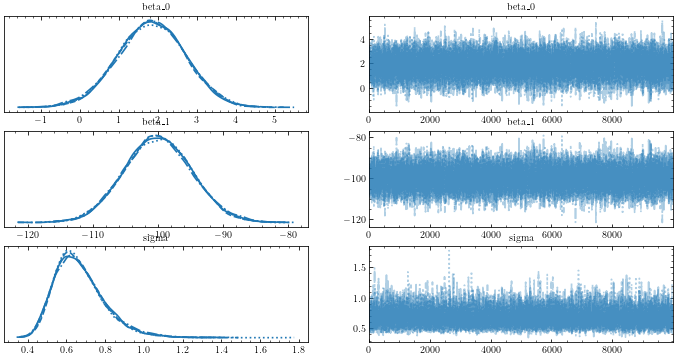

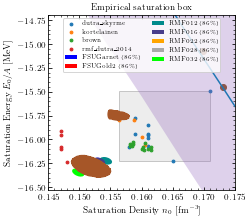

In [4]:
from modules.SaturationAnalysis import SaturationAnalysis
analysis = SaturationAnalysis()
analysis.plot_constraints(eft=True, eft_conf_level=0.95)

## Priors

Let's take a look at the priors used in this work. They can be specified in the file `modules/priors.py`.

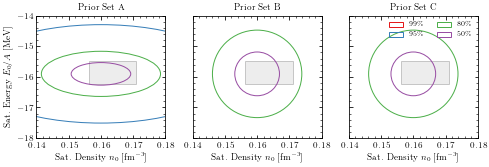

In [5]:
from modules.SaturationAnalysis import visualize_priors
from modules.priors import *
fig, axs = visualize_priors(used_prior_sets)
fig.savefig("prior_sets.pdf")

We use an uninformed prior (left) and an informed prior (right) and something in between (center panel) to investigate the prior sensitivity of our Bayesian inference.

## Saturation box in Drischler et al. (2016)

### Apply our statistical model directly

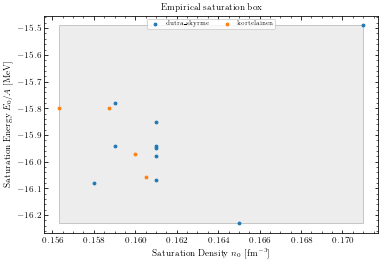

In [6]:
from modules.SaturationAnalysis import drischler_satbox
drischler_satbox.plot(plot_box_estimate=True)

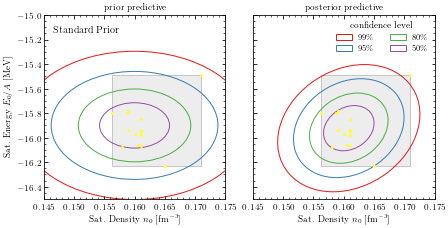

In [7]:
from modules.StatisticalModel import StatisticalModel
model = StatisticalModel(data=drischler_satbox.data_frame)
fig, _ = model.plot_predictives(validate=False)
fig.savefig("analysis_satbox_2016.pdf")

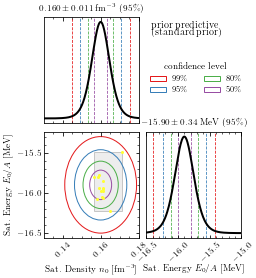

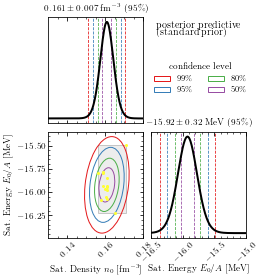

In [8]:
ret = model.plot_predictives_corner()
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("pdf/corner_plot.pdf")
for elem in ret:
    fig, axs = elem
    pdf.savefig(fig)
pdf.close()

Generting the corner plot did not require any sampling of the distribution functions. Only (semi-)analytic calculations. Let's check our implementation brute-force using sampling:

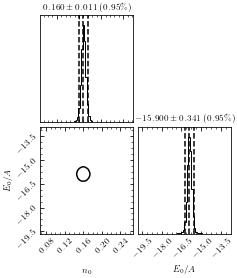

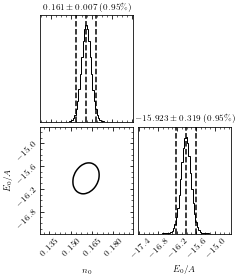

In [9]:
ret = model.plot_predictives_corner_bf()
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("pdf/corner_plot_bf.pdf")
for elem in ret:
    fig, axs = elem
    pdf.savefig(fig)
pdf.close()

The results match. However, the Python package `corner` has a known bug. The percentiles in the titles are always the default ones. We have fixed the issue by computing the percentiles separately. The percentiles above correspond to the 95% confidence level.

In [11]:
model.posterior_params

{'kappa': 15,
 'nu': 24,
 'mu': array([  0.16083667, -15.92253333]),
 'Psi': array([[2.62060933e-04, 2.55211333e-03],
        [2.55211333e-03, 5.11603733e-01]])}

### Alternative: use a single Monte Carlo step

MC sampling: 100%|██████████| 1/1 [01:12<00:00, 72.14s/it]


Quantiles:
[(0.025000000000000022, 0.15362818605986622), (0.975, 0.16804681205004643)]
Quantiles:
[(0.025000000000000022, -16.241099497650495), (0.975, -15.60375507520841)]
expected means and two-sided errors 0.16083712074263767 0.007208934682771451 0.15362818605986622 0.16804605542540912
expected means and two-sided errors -15.922479040855015 0.3186204567954807 -16.241099497650495 -15.603858584059534
current nu: 3.0
current nu: 40.0
current nu: 21.5
current nu: 30.75
current nu: 26.125
current nu: 23.8125
current nu: 22.65625
current nu: 23.234375
current nu: 22.9453125
current nu: 23.08984375
current nu: 23.017578125
current nu: 23.0537109375
current nu: 23.03564453125
current nu: 23.026611328125
current nu: 23.0220947265625
current nu: 23.01983642578125
current nu: 23.018707275390625
current nu: 23.019271850585938
(array([  0.16083712, -15.92247904]), array([[1.21402541e-05, 1.18747355e-04],
       [1.18747355e-04, 2.37311274e-02]]), 23.0)
est cov matrix: [[1.32954087e-05 1.30046258

(array([  0.16083712, -15.92247904]),
 array([[1.21402541e-05, 1.18747355e-04],
        [1.18747355e-04, 2.37311274e-02]]),
 23.0)

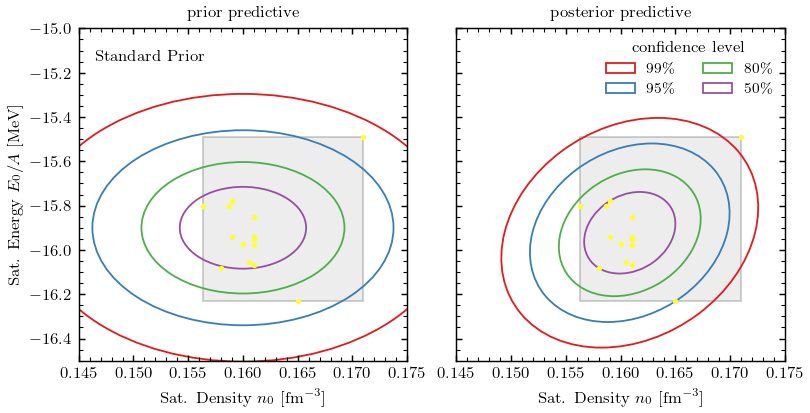

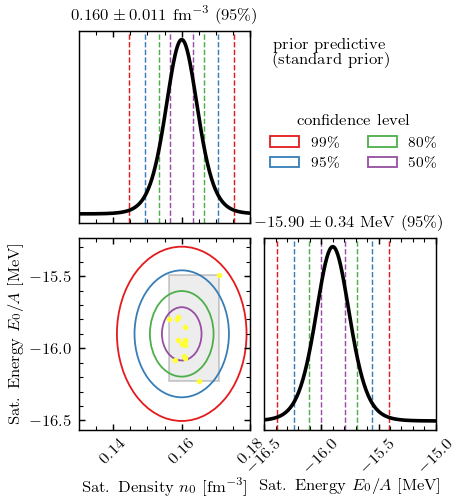

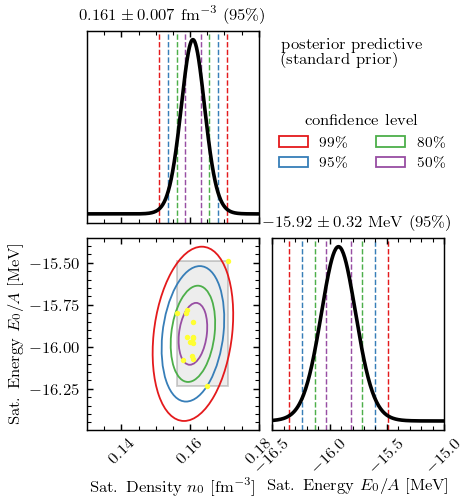

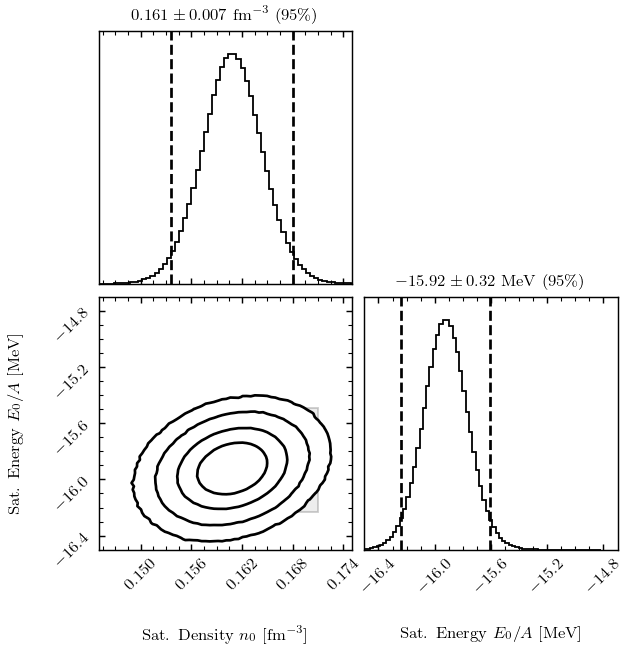

In [52]:
from modules.DataSets import DataSetSampleConfig, Scenario
from modules.SaturationAnalysis import drischler_satbox
from modules.priors import standard_prior_params
scenario1 = Scenario(label="Drischler Satbox",
                     configs=[DataSetSampleConfig(data_set=drischler_satbox)])

analysis.multiverse(scenario1, num_realizations=1, prior_params=standard_prior_params, debug=True)

## Hierarchical model

In [60]:
from modules.DataSets import DataSetSampleConfig, Scenario
from modules.SaturationAnalysis import DEFAULT_DFT_CONSTRAINTS as dft_constraints
scenario1 = Scenario(label="FSU-only",
                     configs=[DataSetSampleConfig(data_set=dft_constraints["FSU"])])
scenario2 = Scenario(label="FSU+Schunck-only",
                     configs=[DataSetSampleConfig(data_set=dft_constraints["FSU"]),
                              DataSetSampleConfig(data_set=dft_constraints["Schunck"])])
scenario3 = Scenario(label="all",
                     configs=[DataSetSampleConfig(data_set=dft_constraints[lbl]) for lbl in dft_constraints.keys()])
scenario4 = Scenario(label="Giuliani+Schunck-only",
                     configs=[DataSetSampleConfig(data_set=dft_constraints["Giuliani"]),
                              DataSetSampleConfig(data_set=dft_constraints["Schunck"])])

In [74]:
scenarioX = Scenario(label="test-scenario",
                     configs=[DataSetSampleConfig(data_set=dft_constraints["Dutra_skyrme"])])

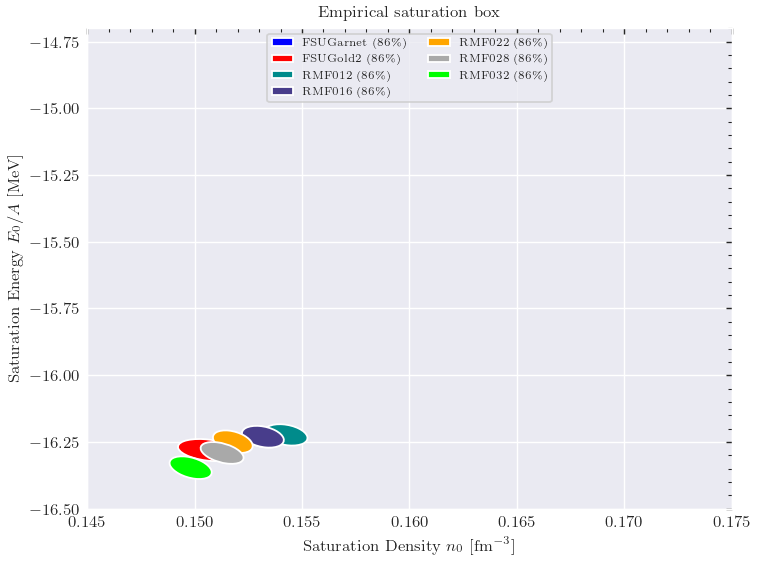

In [61]:
scenario1.configs[0].data_set.plot()

In [ ]:
analysis.multiverse(scenarioX, prior_params=standard_prior_params)

In [ ]:
analysis.multiverse(scenario2)

In [ ]:
analysis.multiverse(scenario3)

In [ ]:
analysis.multiverse(scenario4)

In [ ]:
analysis.plot_individual_models()